#Problem 1

In [50]:
import jax.numpy as np

def sigmoid(x):
    return 1./(1. + np.exp(-x))
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))    


def f(params, x):
    w0 = params[:15]
    b0 = params[15:30]
    w1 = params[30:45]
    b1 = params[60]
    x = tanh(x*w0 + b0)
    x = tanh(np.sum(x*w1) + b1)
    return x

In [51]:
from jax import random

key = random.PRNGKey(0)
params = random.normal(key, shape=(31,))

In [52]:
from jax import grad

df = grad(f, 1)
dfdx=grad(df,1)

In [53]:
inputs = np.linspace(-1, 1., num=10500)


In [54]:
from jax import vmap

f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))

In [55]:
from jax import jit

@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) -1
    ic = f(params,-1) - 0.
    ic2=f(params,1.)-0.
    return np.mean(eq**2)+ ((ic)**2+(ic2)**2)

In [56]:
grad_loss = jit(grad(loss, 0))

In [57]:
epochs =800
learning_rate = 0.0015
momentum = .98
velocity = 0.

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 3.278381
epoch: 100 loss: 0.252049
epoch: 200 loss: 0.051702
epoch: 300 loss: 0.018837
epoch: 400 loss: 0.013218
epoch: 500 loss: 0.012110
epoch: 600 loss: 0.011377
epoch: 700 loss: 0.010772


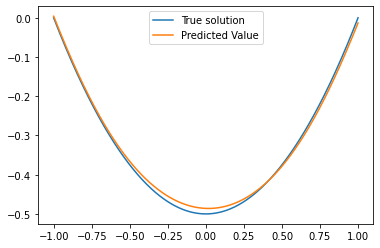

In [58]:
import matplotlib.pyplot as plt

plt.plot(inputs, .5*(inputs*inputs-1), label='True solution')
plt.plot(inputs, f_vect(params, inputs), label='Predicted Value')
plt.legend()
plt.show()

Here activation function 'tanh' provide predicted value overlapping with true solution. I had also tried to use sigmoid activation function but it showed huge loss , So i prefered tanh function

#Problem 2

In [59]:
import jax.numpy as np

def sigmoid(x):
    return 1./(1. + np.exp(-x))
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))    


def f(params, x):
    w0 = params[:15]
    b0 = params[15:30]
    w1 = params[30:45]
    b1 = params[60]
    x = tanh(x*w0 + b0)
    x = tanh(np.sum(x*w1) + b1)
    return x

In [60]:
from jax import random

key = random.PRNGKey(0)
params = random.normal(key, shape=(31,))

In [61]:
from jax import grad

df = grad(f, 1)
dfdx=grad(df,1)

In [62]:
inputs = np.linspace(-2, 2., num=10500)


In [63]:
from jax import vmap

f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))

In [64]:
from jax import jit

@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) -2
    ic = f(params,-1) - 0.
    ic2=f(params,2.)-0.
    return np.mean(eq**2)+ ((ic)**2+(ic2)**2)

In [65]:
grad_loss = jit(grad(loss, 0))

In [66]:
epochs =800
learning_rate = 0.0015
momentum = .98
velocity = 0.

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 6.121270
epoch: 100 loss: 2.428862
epoch: 200 loss: 2.202896
epoch: 300 loss: 2.073065
epoch: 400 loss: 1.986615
epoch: 500 loss: 1.929261
epoch: 600 loss: 1.881480
epoch: 700 loss: 1.844081


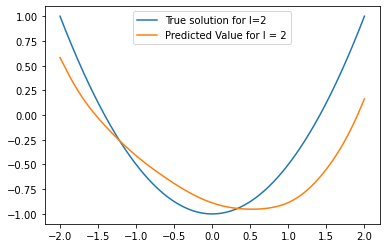

In [67]:
import matplotlib.pyplot as plt

plt.plot(inputs, .5*(inputs*inputs-2), label='True solution for l=2')
plt.plot(inputs, f_vect(params, inputs), label='Predicted Value for l = 2')
plt.legend()
plt.show()

In [68]:
import jax.numpy as np

def sigmoid(x):
    return 1./(1. + np.exp(-x))
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))    


def f(params, x):
    w0 = params[:15]
    b0 = params[15:30]
    w1 = params[30:45]
    b1 = params[60]
    x = tanh(x*w0 + b0)
    x = tanh(np.sum(x*w1) + b1)
    return x

In [69]:
from jax import random

key = random.PRNGKey(0)
params = random.normal(key, shape=(31,))

In [70]:
from jax import grad

df = grad(f, 1)
dfdx=grad(df,1)

In [71]:
inputs = np.linspace(-1.5, 1.5, num=10500)


In [72]:
from jax import vmap

f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))

In [73]:
from jax import jit

@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) -1.5
    ic = f(params,-1) - 0.
    ic2=f(params,1.5)-0.
    return np.mean(eq**2)+ ((ic)**2+(ic2)**2)

In [74]:
grad_loss = jit(grad(loss, 0))

In [75]:
epochs =800
learning_rate = 0.0015
momentum = .98
velocity = 0.

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 4.465652
epoch: 100 loss: 0.802569
epoch: 200 loss: 0.460812
epoch: 300 loss: 0.416083
epoch: 400 loss: 0.382945
epoch: 500 loss: 0.394710
epoch: 600 loss: 0.338699
epoch: 700 loss: 0.332467


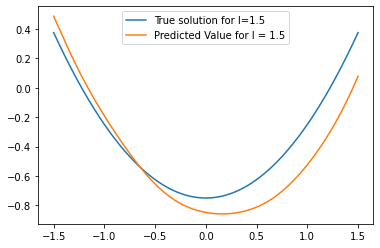

In [76]:
import matplotlib.pyplot as plt

plt.plot(inputs, .5*(inputs*inputs-1.5), label='True solution for l=1.5')
plt.plot(inputs, f_vect(params, inputs), label='Predicted Value for l = 1.5')
plt.legend()
plt.show()

In [77]:
import jax.numpy as np

def sigmoid(x):
    return 1./(1. + np.exp(-x))
def tanh(x):
	return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))    


def f(params, x):
    w0 = params[:15]
    b0 = params[15:30]
    w1 = params[30:45]
    b1 = params[60]
    x = tanh(x*w0 + b0)
    x = tanh(np.sum(x*w1) + b1)
    return x

In [78]:
from jax import random

key = random.PRNGKey(0)
params = random.normal(key, shape=(31,))

In [79]:
from jax import grad

df = grad(f, 1)
dfdx=grad(df,1)

In [80]:
inputs = np.linspace(-1.25, 1.25, num=10500)


In [81]:
from jax import vmap

f_vect = vmap(f, (None, 0))
dfdx_vect = vmap(dfdx, (None, 0))

In [82]:
from jax import jit

@jit
def loss(params, inputs):
    eq = dfdx_vect(params, inputs) -1.25
    ic = f(params,-1) - 0.
    ic2=f(params,1.25)-0.
    return np.mean(eq**2)+ ((ic)**2+(ic2)**2)

In [83]:
grad_loss = jit(grad(loss, 0))

In [84]:
epochs =800
learning_rate = 0.0015
momentum = .98
velocity = 0.

for epoch in range(epochs):
    if epoch % 100 == 0:
        print('epoch: %3d loss: %.6f' % (epoch, loss(params, inputs)))
    gradient = grad_loss(params + momentum*velocity, inputs)
    velocity = momentum*velocity - learning_rate*gradient
    params += velocity

epoch:   0 loss: 3.848252
epoch: 100 loss: 0.326873
epoch: 200 loss: 0.077804
epoch: 300 loss: 0.050340
epoch: 400 loss: 0.041194
epoch: 500 loss: 0.035317
epoch: 600 loss: 0.030787
epoch: 700 loss: 0.027336


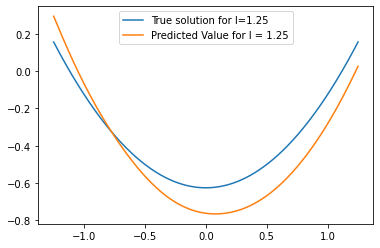

In [85]:
import matplotlib.pyplot as plt

plt.plot(inputs, .5*(inputs*inputs-1.25), label='True solution for l=1.25')
plt.plot(inputs, f_vect(params, inputs), label='Predicted Value for l = 1.25')
plt.legend()
plt.show()